In [1]:
import os
from dotenv import load_dotenv
from langgraph.graph import MessagesState, StateGraph, START, END
from library import Logmsg, getAIMessage

load_dotenv(override=True, dotenv_path="../sample.env")
Logmsg(os.getenv("APP_NAME"))


TEST_AGENT


In [2]:
URL = "https://in.investing.com/currencies/usd-jpy-technical"
indicatorList = [
    "RSI(14)",
    "STOCH(9,6)",
    "STOCHRSI(14)",
    "MACD(12,26)",
    "ADX(14)",
    "Williams %R",
    "CCI(14)",
    "ATR(14)",
    "Highs/Lows(14)",
    "Ultimate Oscillator",
    "ROC",
    "Bull/Bear Power(13)",
    "MA5",
    "MA10",
    "MA20",
    "MA50",
    "MA100",
    "MA200",
    "Classic",
    "Fibonacci",
    "Camarilla",
    "Woodie's"
]

from langchain_openai import ChatOpenAI

class BotState(MessagesState):
    pass

g= StateGraph(BotState)

model = os.getenv("GPT_MODEL")
llm = ChatOpenAI(model=model)
tools = []
llm_with_tools = llm.bind_tools(tools)


In [3]:
def DataExtractor(state: BotState):
    return {"messages": [llm.invoke(state["messages"])]}




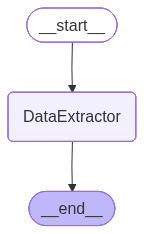

In [4]:
from IPython.core.display import Image
g.add_node(DataExtractor)

g.add_edge(START, "DataExtractor")
g.add_edge("DataExtractor", END)

graph = g.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
from langchain_core.messages import HumanMessage
import requests
html_content = requests.get(URL).content

system_prompt = (
    f"URL for extracting data from HTML : {html_content}"
    f"Need to extract data for the followings { ", ".join(indicatorList)}"
    "will provide only extracted data as json for above mentioned indicators"
)

msg = [HumanMessage(content=system_prompt)]

response = graph.invoke({"messages": msg})
getAIMessage(response)

'It seems that the HTML you provided is a challenge page, likely caused by Cloudflare\'s security features. This means that you cannot extract data directly from the page because it’s set up to block automated access until certain conditions (like enabling JavaScript and cookies) are met.\n\nFurthermore, to access financial indicators such as RSI, MACD, and others that you\'re interested in, you would typically need to retrieve data from a server or API that provides those indicators. Since the HTML snippet does not contain the indicators you\'re looking to extract, you cannot simply parse this HTML.\n\nYou will need to perform the following steps to get the required data:\n\n1. **Check API Access**: Look for an official API from your data provider (like investing.com or an equivalent). Many financial data providers offer APIs that allow you to retrieve technical indicators as JSON data.\n\n2. **Handle Security Features**: If the site has measures like requiring JavaScript or cookies, 